<h3> Recap: $k$-Nearest Neighbours ($k$NN) Classifier </h3>

<h3> 1. Calculate the distance of all training points to the test point </h3>

<h3> 2. Find the $k$ nearest training points </h3>

---


<h3> Recap: $k$-Means Clustering </h3>

<ol>
    <h3> <li> Randomly select $k$ data points as 'initial' centers </h3>
    <h3> <li> Repeat till convergence: </h3>
        <ol>
        <h3> <li> Calculate distance of all data points to the $k$ centers </h3>
        <h3> <li> Update Cluster Membership: Assign data points to its closest center </h3>
        <h3> <li> Update Centers: Calculate the mean of all data points in a cluster </h3>
        </ol>
</ol>

---



---

<h3> Application of $k$NN: Classification of Hand-Written Digits </h3>

<h3> 1. Load the digits data set </h3>


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split


# Load the digits data set
X, y = load_digits().data, load_digits().target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


# Show a random image
r_idx = np.random.randint(X_train.shape[0])


plt.figure(dpi=50)
plt.imshow(np.reshape(X_train[r_idx], (8,8)), cmap='gray')
plt.xlabel('Digit '+str(y_train[r_idx]), fontsize=24)
plt.xticks([],[])
plt.yticks([],[])
plt.show()


<Figure size 320x240 with 1 Axes>


<h3> 2. Classify a test image </h3>

<h3> 3. Show the $k$ nearest neighbouring images </h3>


Test Digit and Predicted Label:


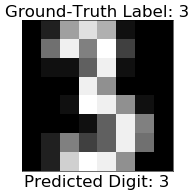


The 5 nearest neighbours:


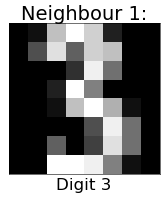

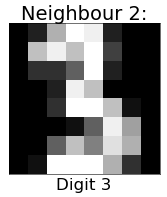

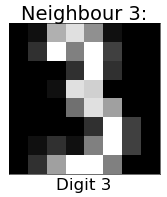

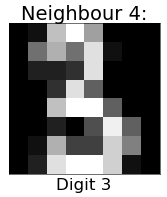

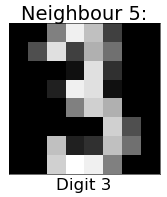

In [3]:
from sklearn.neighbors import KNeighborsClassifier


k = 5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

# Select a random test image
r_idx = np.random.randint(X_test.shape[0])
test_p = X_test[r_idx][None,:]

y_pred = knn.predict(test_p)
dist, idx = knn.kneighbors(test_p)


print('Test Digit and Predicted Label:')
plt.figure(dpi=50)
plt.imshow(np.reshape(test_p, (8,8)), cmap='gray')
plt.xlabel('Predicted Digit: '+str(y_pred[0]), fontsize=24)
plt.title('Ground-Truth Label: '+str(y_test[r_idx]), fontsize=24)
plt.xticks([],[]) 
plt.yticks([],[])
plt.show()
print('\nThe '+str(k)+' nearest neighbours:')
for i in range(k):
    plt.figure(dpi=50)
    plt.imshow(np.reshape(X_train[idx[0,i], :], (8,8)), cmap='gray')
    plt.title('Neighbour '+str(i+1)+':', fontsize=28)
    plt.xlabel('Digit '+str(y_train[idx[0,i]]), fontsize=24)
    plt.xticks([],[])
    plt.yticks([],[])
plt.show()



---

<h3> Application of $k$-Means Clustering: Image Segmentation </h3>


C:\Users\avisek\Anaconda3\lib\site-packages\sklearn\datasets\base.py:762: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  images = [imread(filename) for filename in filenames]
C:\Users\avisek\Anaconda3\lib\site-packages\sklearn\datasets\base.py:762: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  images = [imread(filename) for filename in filenames]


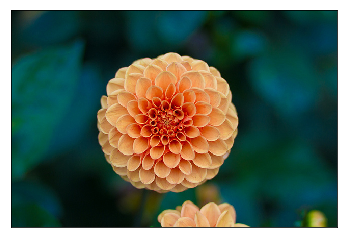

In [4]:
from sklearn.datasets import load_sample_images

img = load_sample_images().images[1]

plt.figure(120)
plt.imshow(img)
plt.xticks([], [])
plt.yticks([], [])
plt.show()


<h3> Segment the image into 2, 3, 5, and 10 clusters </h3>


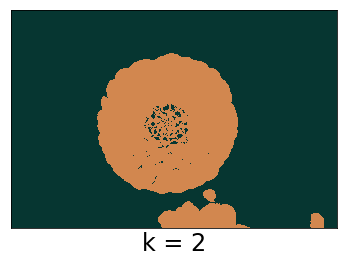

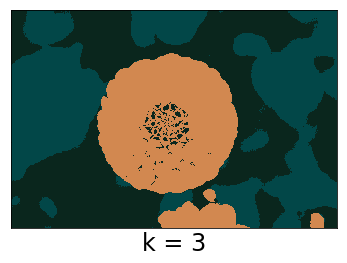

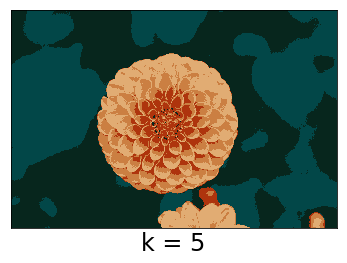

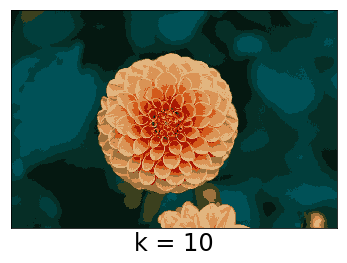

In [5]:
X = np.reshape(img, (img.shape[0]*img.shape[1], img.shape[2]))

from sklearn.cluster import KMeans

for k in [2, 3, 5, 10]:
    km1 = KMeans(n_clusters=k, max_iter=60, n_init=3).fit(X)
    
    cluster_img = np.reshape(km1.cluster_centers_[km1.labels_], img.shape)
    cluster_img = np.array(cluster_img, dtype=int)
    
    
    plt.figure(120)
    plt.imshow(np.reshape(cluster_img, img.shape))
    plt.xlabel('k = '+str(k), fontsize=24)
    plt.xticks([],[])
    plt.yticks([],[])
    plt.show()
    


---

---

---


<h3> Classification Method: $k$-Nearest Neighbours Classifier </h3>

<h3> Clustering Method: $k$-Means Clustering </h3>

<h3> Why learn any other Classification / Clustering Method? </h3>

---

<h3> Classification: </h3>

<h3> No Free Lunch Theorem - Averaged across <u> all possible </u> data sets, the performance of any two classifiers are equivalent. </h3>

---

<h3> Clustering: </h3>

<h3> Impossibility Theorem for Clustering. </h3>

---

<h3> An Empiricist Approach - Pick a classification / clustering method from those that works best for the domain of data. </h3>

<h3> How do we know what works best for a particular domain of data? </h3>

<ul>
    <li> <h3> Mathematical Intuition behind the method </h3>
    <li> <h3> Research Papers / Experience </h3>
</ul>



---

---

---



<h3> Unsupervised Learning: Dimension Reduction </h3>

<h3> Principal Component Analysis </h3>

---


<h3> 1. Generate points in 3 dimensions </h3>


<IPython.core.display.Javascript object>


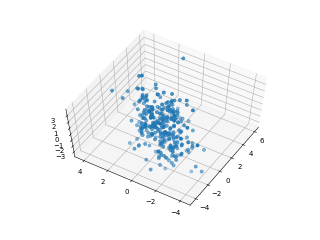

In [2]:
%matplotlib notebook

X = np.random.multivariate_normal(mean=[0,0,0], cov=[[2,1,1], [1,2,1],[1,1,2]], size=300)

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(dpi=50)
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:,0], X[:,1], X[:,2])
plt.show()

<h3> 2. Project to 2 dimensions </h3>


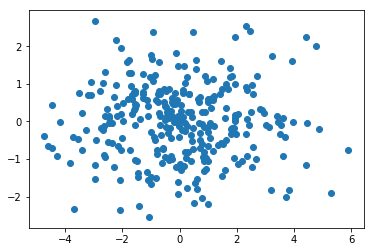

In [7]:
from sklearn.decomposition import PCA

X_proj = PCA(n_components=2).fit_transform(X)


%matplotlib inline
plt.figure()
plt.scatter(X_proj[:,0], X_proj[:,1])
plt.show()

<h3> Implementing PCA: </h3>
    
<h3> 1. Mean-center the data </h3>

<h3> 2. Form the Covariance Matrix of the data </h3>

<h3> 3. Find the Eigen-values and Eigen-vectors of the Covariance Matrix </h3>

<h3> 4. Project the data onto the Eigen-vectors corresponding to the top $k$ Eigen-values </h3>

<IPython.core.display.Javascript object>


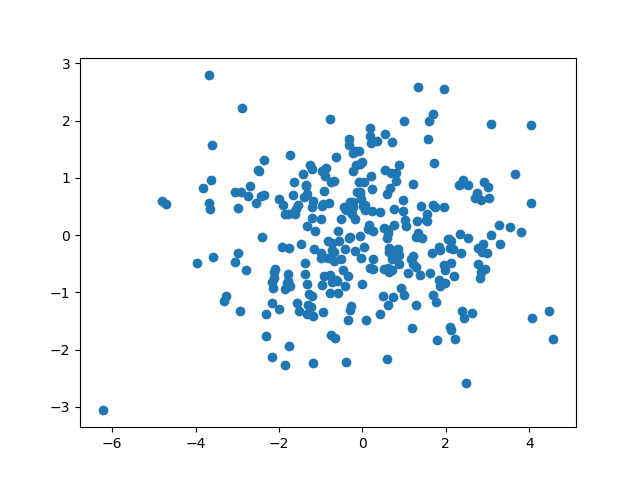

In [4]:
#X is a data matrix
# 1. Mean-center the data
X= X - np.mean(X, axis=0)

# 2. Form the Covariance Matrix of the data
c=np.dot(X.T,X)

# 3. Find the Eigen-values and Eigen-vectors of the Covariance Matrix
eigvals, eigvecs = np.linalg.eigh(c)

# 4. Project the data onto the Eigen-vectors corresponding to the top $k$ Eigen-values </h3>
X_proj = X @ eigvecs[:, [-1,-2]]

 
plt.figure()
plt.scatter(X_proj[:,0], X_proj[:,1])
plt.show()


---

---

---


<h2 style="color:maroon"> References: </h2>

<h3> <a src="https://scikit-learn.org/stable/user_guide.html"> Scikit Learn User Guide </a> </h3>
